In [ ]:
"""
Written and maintained by Andreas Mentzelopoulos
Copyright (c) 2025, Andreas Mentzelopoulos. All Rights Reserved.

This code is the exclusive property of Andreas Mentzelopoulos
All associated materials (data, models, scripts) are the
exclusive property of Andreas Mentzelopoulos and LOBSTgER.

This code may be used openly and freely for research and education purposes. 
No part of this code may be used, copied, distributed, or modified for commercial use, 
without the prior written consent of Andreas Mentzelopoulos.

For permission requests, contact: Andreas Mentzelopoulos, ament@mit.edu.
"""

In [1]:
from helpers.inference_utils import load_model_and_test_loader
from helpers.pre_trained_autoencoder import load_autoencoder
from model_architectures import ConditionalUNet
from helpers.inference_utils import generate_unconditional, generate_conditional
from helpers.read_data_tools import load_imageDataset, read_data
from helpers.artificial_corruption_utils import corrupt_individually
import torch

/home/ament/miniconda3/envs/LOBSTgER/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
## Load the model with default parameters

from helpers.diffusion_utils_conditional import cosine_beta_schedule

## User must specify the model dimensions and the number of timesteps
## These must be the same as the model used to train the dataset
model_dim = 128
dim_mults = (1,2)
model_name = "many_timesteps_model"
total_timesteps = 2000
beta_t = cosine_beta_schedule(timesteps = total_timesteps) 
device = "cuda" if torch.cuda.is_available() else "cpu"

model = ConditionalUNet(dim = model_dim, dim_mults = dim_mults, beta_t = beta_t, timesteps = total_timesteps).eval().to(device)
test_loader = load_model_and_test_loader(model, checkpoint_path = "model_checkpoints/" + model_name + ".pth")
#train_imageDataset = load_imageDataset(save_name = "train_imageDataset")
autoencoder = load_autoencoder(half_precision = True)

Model updated with EMA parameters, loaded with strict = False


In [3]:
## Load the inference images that need enhancement

test_img, _ =  read_data(root_dir = "test_images", no_split = True)
test_img = torch.stack(test_img)

Loading Test_category_2: 100%|██████████| 1/1 [00:00<00:00, 21.24it/s]


Generating images: 100%|██████████| 49/49 [00:00<00:00, 59.64it/s]


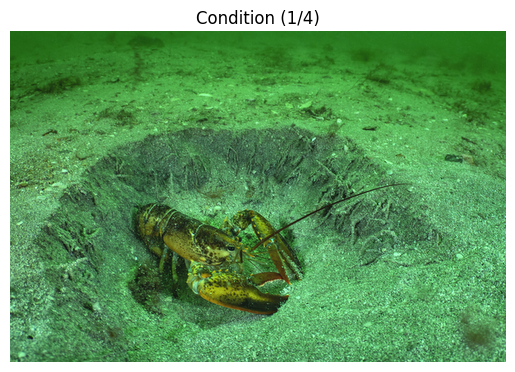

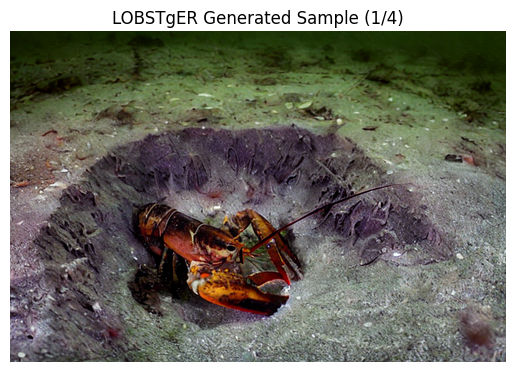

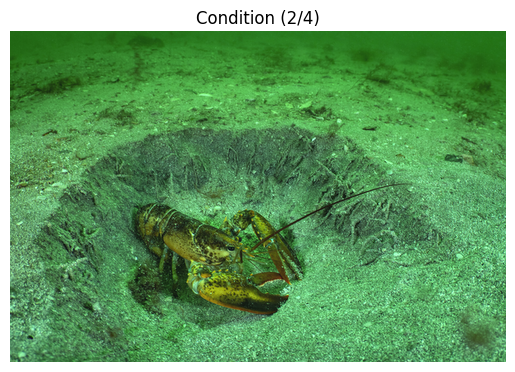

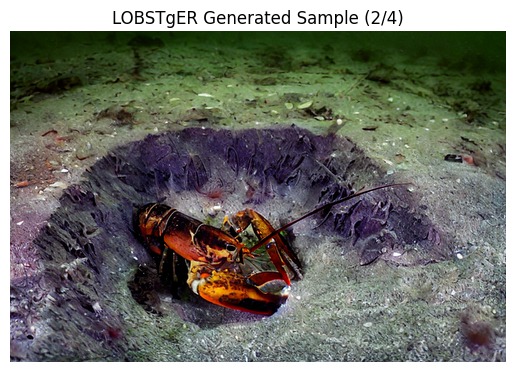

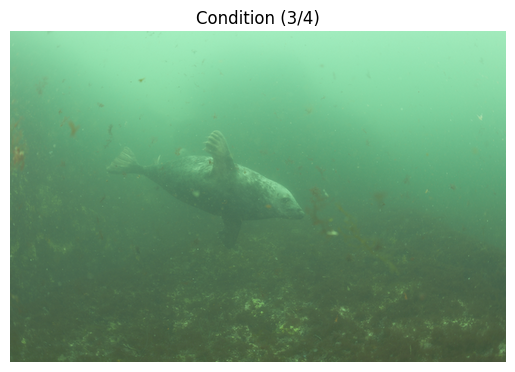

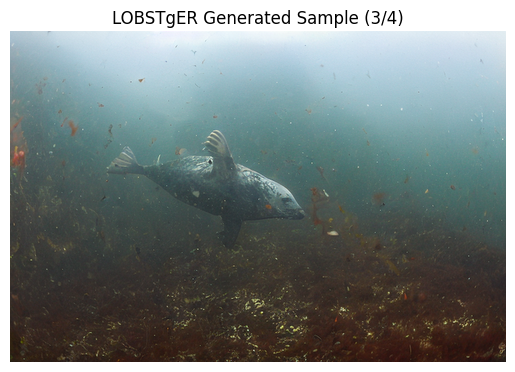

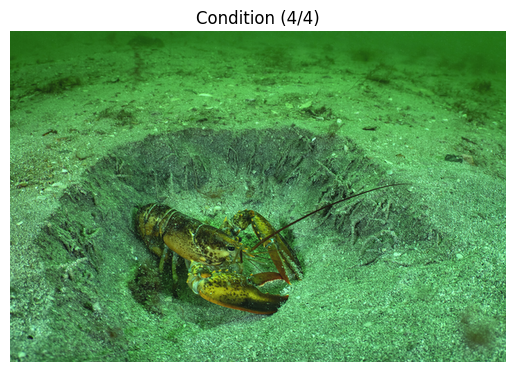

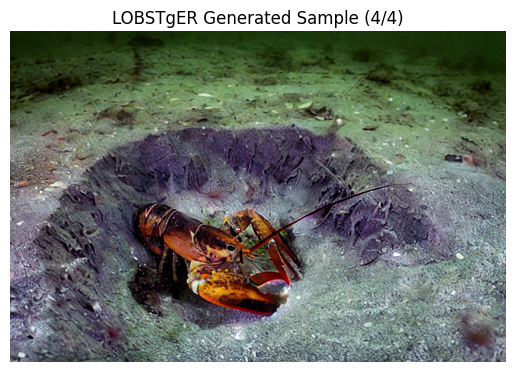

In [11]:
## Image-to-image enhancement

corrupted_img = corrupt_individually(test_img, motion_blur = False, add_bubbles = False, apply_inpainting = False)
sixteen_random = torch.randint(len(corrupted_img), (4,))

quick = True
quick_inference_steps = 50
cfg = True
cfg_scale = 1.5

generate_conditional(model = model, 
                       autoencoder = autoencoder, 
                       total_timesteps = model.timesteps,
                       corrupted_img = corrupted_img[sixteen_random], 
                       quick = quick, 
                       cfg = cfg,
                       cfg_scale = cfg_scale,  
                       quick_inference_steps = quick_inference_steps, 
                       train_imageDataset = None)

In [ ]:
## Unconditional Generation from null token 
## This requires A LOT of data to work well 
## Thousands (>50k) images are recommended for good results

num_samples = 4
quick = False
quick_inference_steps = 50

generate_unconditional(model = model, 
                       autoencoder = autoencoder, 
                       num_samples = num_samples, 
                       total_timesteps = model.timesteps,
                       quick = quick, 
                       quick_inference_steps = quick_inference_steps, 
                       train_imageDataset = None)